# Final Group Project 

This dataset is one of the sample datasets obtained from IBM. It contains the results of an auto insurance company's marketing campaign which offers customers with expiring policies one of four different renewal proposals to retain them.  The data has 9134 customer records with 24 variables. The policies for all customers expire between Jan 1 to Feb 28, 2011. 

Link to the dataset: https://www.kaggle.com/pankajjsh06/ibm-watson-marketing-customer-value-data

The main objective of the analysis is to build a regression model to predict the customer lifetime value and a classfication model to determine if a customer will accept or reject the renewal offer. If the renewal acceptance rate is low, clutsering analysis will be performed to determine the attributes that can lead to more consumers opting for renewal. Moreover, the analysis will try to pair the customer with the one of four renewal offers so that they are more liely to accept the offer.

### Importing required libraries 

In [44]:
#load libraries 

import pandas as pd 
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#install pandas-profiling if needed
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

#***Need to figure out table of contents 
#!pip install jupyter_contrib_nbextensions
#!pip install jupyter_nbextensions_configurator
#!jupyter contrib nbextension install --user
#!jupyter nbextension enable toc2/main
#!jupyter labextension install @jupyterlab/toc

import pandas_profiling as pp
from pandas_profiling import ProfileReport

from sklearn import (
    ensemble,
    model_selection,
    preprocessing,
    tree
)
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    auc,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    accuracy_score,
    precision_score,
    average_precision_score,
    recall_score,
    f1_score,
    precision_recall_curve,
    cohen_kappa_score,
    confusion_matrix,
    plot_confusion_matrix,
    classification_report
)
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    cross_val_score,
    cross_val_predict
)

### Loading the dataset into dataframe 

In [45]:
df = pd.read_csv(r"C:\Users\shiva\Downloads\WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv\WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv")
df.head()

Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  Income  ...  \
0           2/24/11         Employed      F   56274  ...   
1           1/31/11       Unemployed      F       0  ...   
2           2/19/11         Employed      F   48767  ...   
3           1/20/11       Unemployed      M       0  ...   
4            2/3/11         Employed      M   43836  ...   

  Months Since Policy Inception Number of Open Complaints  Number of Policies  \
0                             5                         0                   1   
1                            42                         0                   8   
2                            38                         0                   2   
3                            65                         0                   7   
4                            44                         0                   1   

      Policy Type        Policy  Renew Offer Type  Sales Channel  \
0  Corporate Auto  Corporate L3            Offer1          Agent   
1   Personal Auto   Personal L3            Offer3          Agent   
2   Personal Auto   Personal L3            Offer1          Agent   
3  Corporate Auto  Corporate L2            Offer1    Call Center   
4   Personal Auto   Personal L1            Offer1          Agent   

  Total Claim Amount  Vehicle Class Vehicle Size  
0         384.811147   Two-Door Car      Medsize  
1        1131.464935  Four-Door Car      Medsize  
2         566.472247   Two-Door Car      Medsize  
3         529.881344            SUV      Medsize  
4         138.130879  Four-Door Car      Medsize  

[5 rows x 24 columns]

### Data Dictionary 

In [46]:
df_dictionary = pd.read_csv(r"C:\Users\shiva\Downloads\DataDictionary.csv").dropna()
df_dictionary.style.set_properties(subset=['Description'], **{'width': '500px'})

### Checking the dimensions

In [47]:
df.shape

(9134, 24)

### Check the datatypes 

In [48]:
df.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

### Checking the column names

In [49]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

## Profile data using pandas_profiling

In [50]:
import pandas_profiling
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/37 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Key insights from the profile report

- There are no missing values 
- Policy and  Policy Type are highly correlated (will be further explored)
- Around 15%  of the customers accepted the renewal offer (will be further explored)

# Data Exploration


### Count of columns with specific datatype

In [51]:
dtype = pd.DataFrame(df.dtypes.value_counts().sort_values(), columns =  ['Count'])
dtype

Count
float64      2
int64        6
object      16

TypeError: Cannot cast Index to dtype int32

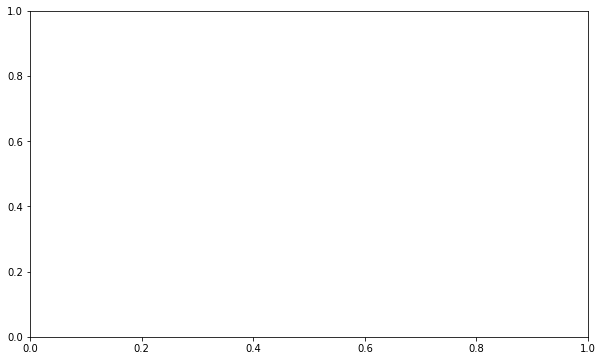

In [52]:
# Count of each type of column
df.dtypes.value_counts().sort_values().plot(kind='barh',figsize=(10, 6),fontsize=12)
plt.title('Number of columns by data types', fontsize=12)
plt.xlabel('Number of columns', fontsize=12)
plt.ylabel('Data type', fontsize=12)

### Descriptive statistics


In [53]:
df.describe()

Customer Lifetime Value        Income  Monthly Premium Auto  \
count              9134.000000   9134.000000           9134.000000   
mean               8004.940475  37657.380009             93.219291   
std                6870.967608  30379.904734             34.407967   
min                1898.007675      0.000000             61.000000   
25%                3994.251794      0.000000             68.000000   
50%                5780.182197  33889.500000             83.000000   
75%                8962.167041  62320.000000            109.000000   
max               83325.381190  99981.000000            298.000000   

       Months Since Last Claim  Months Since Policy Inception  \
count              9134.000000                    9134.000000   
mean                 15.097000                      48.064594   
std                  10.073257                      27.905991   
min                   0.000000                       0.000000   
25%                   6.000000                      24.000000   
50%                  14.000000                      48.000000   
75%                  23.000000                      71.000000   
max                  35.000000                      99.000000   

       Number of Open Complaints  Number of Policies  Total Claim Amount  
count                9134.000000         9134.000000         9134.000000  
mean                    0.384388            2.966170          434.088794  
std                     0.910384            2.390182          290.500092  
min                     0.000000            1.000000            0.099007  
25%                     0.000000            1.000000          272.258244  
50%                     0.000000            2.000000          383.945434  
75%                     0.000000            4.000000          547.514839  
max                     5.000000            9.000000         2893.239678

In [54]:
### Checking for missing values

In [55]:
def missing_values(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(columns={
        0: 'Missing Values',
        1: '% of Total Values'
    })
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
            '% of Total Values', ascending=False).round(1)
    print("Dataframe has " + str(df.shape[1]) + " columns.")
    print("There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")
    
    return mis_val_table_ren_columns

# Missing values statistics
miss_values = missing_values(df)

Dataframe has 24 columns.
There are 0 columns that have missing values.


### Target Variables 

Since there are two models, regression and classification, there are two target variables. The target variable for regression model is Customer Lifetime Value and target variable for classfication variable is reponse. 

### Analyzing the response variable (target variable for classification model)

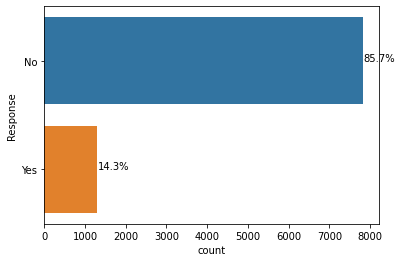

In [56]:
#checking to see if the data is imablanced by looking at the distrbution of the target variable 
ax = sns.countplot(y="Response", data=df)
total = len(df['Response'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() 
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

As it can be seen above that the data is highly imbalanced, with only 14.3% actually accepting the renewal offers, Hence, before training the model, sampling techniques will be used to address this problem. 

### Analyzing the Customer Lifetime Value (target variable for regression model)

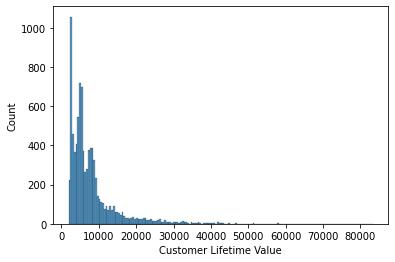

In [57]:
#plotting histogram to visualize their distribution 
sns.histplot(df['Customer Lifetime Value'])
plt.show()

As it can be seen from teh above plot, the distribution of CLV is skewed towards right. 

### Correlations

In [116]:
corr = df.corr()['Response'].sort_values()
# Display correlations
print('Positive Correlations:')
print('-----------------------------------')
print(corr.tail(5))
print('\n Negative Correlations:')
print('------------------------------')
print(corr.head(4))

Positive Correlations:
-----------------------------------
Months Since Policy Inception    0.002952
Monthly Premium Auto             0.010966
Income                           0.011932
Total Claim Amount               0.016877
Response                         1.000000
Name: Response, dtype: float64

 Negative Correlations:
------------------------------
Number of Policies          -0.020891
Months Since Last Claim     -0.016597
Number of Open Complaints   -0.009881
Customer Lifetime Value     -0.008930
Name: Response, dtype: float64


Text(0.5, 1.0, 'Correlation Heatmap')

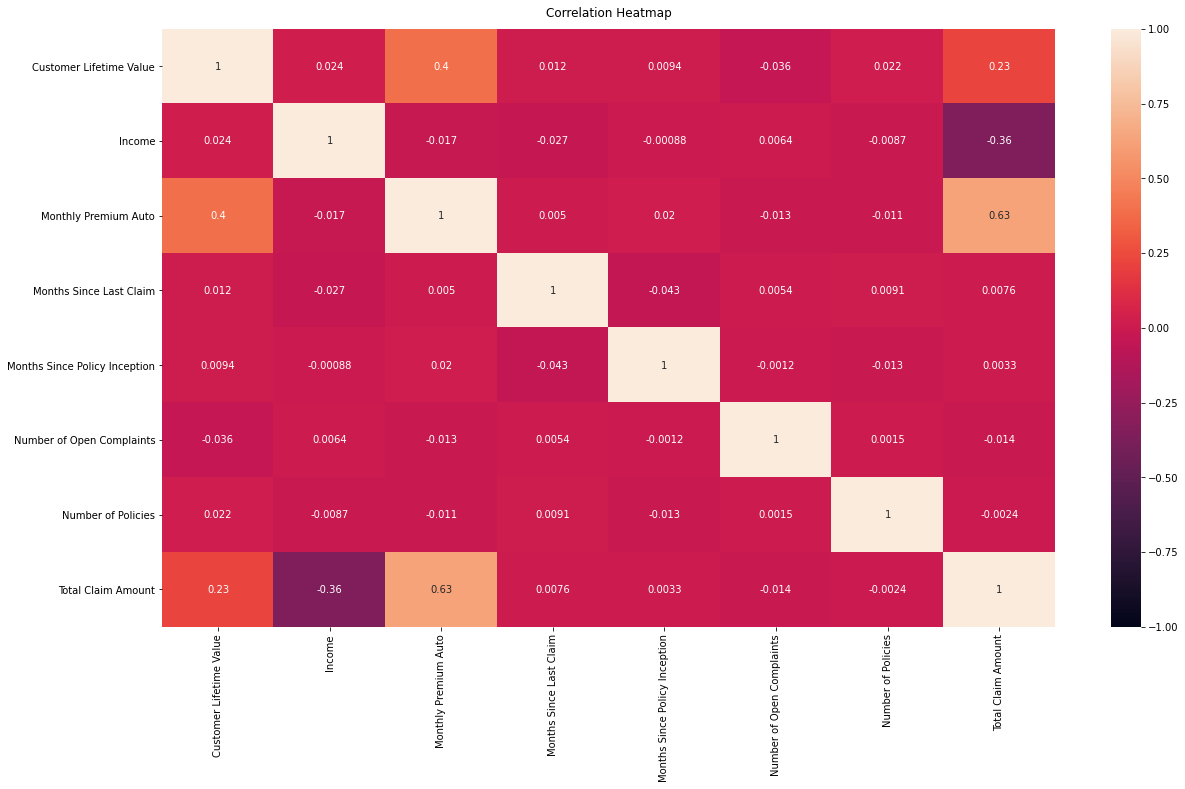

In [58]:
#Checking for correlation (for numerical variables)
corr_matrix = df.corr(method= 'pearson')
#To make it easier to find correlation, it is better to visualize the correlation matrix via a heatmap
plt.figure(figsize=(20, 11))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

### Clean Column Names 

In [59]:
def clean_col(name):
    return (
        name.strip().lower().replace(" ", "_")
    )
df.rename(columns=clean_col)

customer       state  customer_lifetime_value response  coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     education effective_to_date employmentstatus gender  income  ...  \
0     Bachelor           2/24/11         Employed      F   56274  ...   
1     Bachelor           1/31/11       Unemployed      F       0  ...   
2     Bachelor           2/19/11         Employed      F   48767  ...   
3     Bachelor           1/20/11       Unemployed      M       0  ...   
4     Bachelor            2/3/11         Employed      M   43836  ...   
...        ...               ...              ...    ...     ...  ...   
9129  Bachelor           2/10/11         Employed      M   71941  ...   
9130   College           2/12/11         Employed      F   21604  ...   
9131  Bachelor            2/6/11       Unemployed      M       0  ...   
9132   College            2/3/11         Employed      M   21941  ...   
9133   College           2/14/11       Unemployed      M       0  ...   

     months_since_policy_inception number_of_open_complaints  \
0                                5                         0   
1                               42                         0   
2                               38                         0   
3                               65                         0   
4                               44                         0   
...                            ...                       ...   
9129                            89                         0   
9130                            28                         0   
9131                            37                         3   
9132                             3                         0   
9133                            90                         0   

      number_of_policies     policy_type        policy  renew_offer_type  \
0                      1  Corporate Auto  Corporate L3            Offer1   
1                      8   Personal Auto   Personal L3            Offer3   
2                      2   Personal Auto   Personal L3            Offer1   
3                      7  Corporate Auto  Corporate L2            Offer1   
4                      1   Personal Auto   Personal L1            Offer1   
...                  ...             ...           ...               ...   
9129                   2   Personal Auto   Personal L1            Offer2   
9130                   1  Corporate Auto  Corporate L3            Offer1   
9131                   2  Corporate Auto  Corporate L2            Offer1   
9132                   3   Personal Auto   Personal L2            Offer3   
9133                   1  Corporate Auto  Corporate L3            Offer4   

      sales_channel total_claim_amount  vehicle_class vehicle_size  
0             Agent         384.811147   Two-Door Car      Medsize  
1             Agent        1131.464935  Four-Door Car      Medsize  
2             Agent         566.472247   Two-Door Car      Medsize  
3       Call Center         529.881344            SUV      Medsize  
4             Agent         138.130879  Four-Door Car      Medsize  
...             ...                ...            ...          ...  
9129            Web         198.234764  Four-Door Car      Medsize  
9130         Bran